In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(tf. __version__)

2.16.1


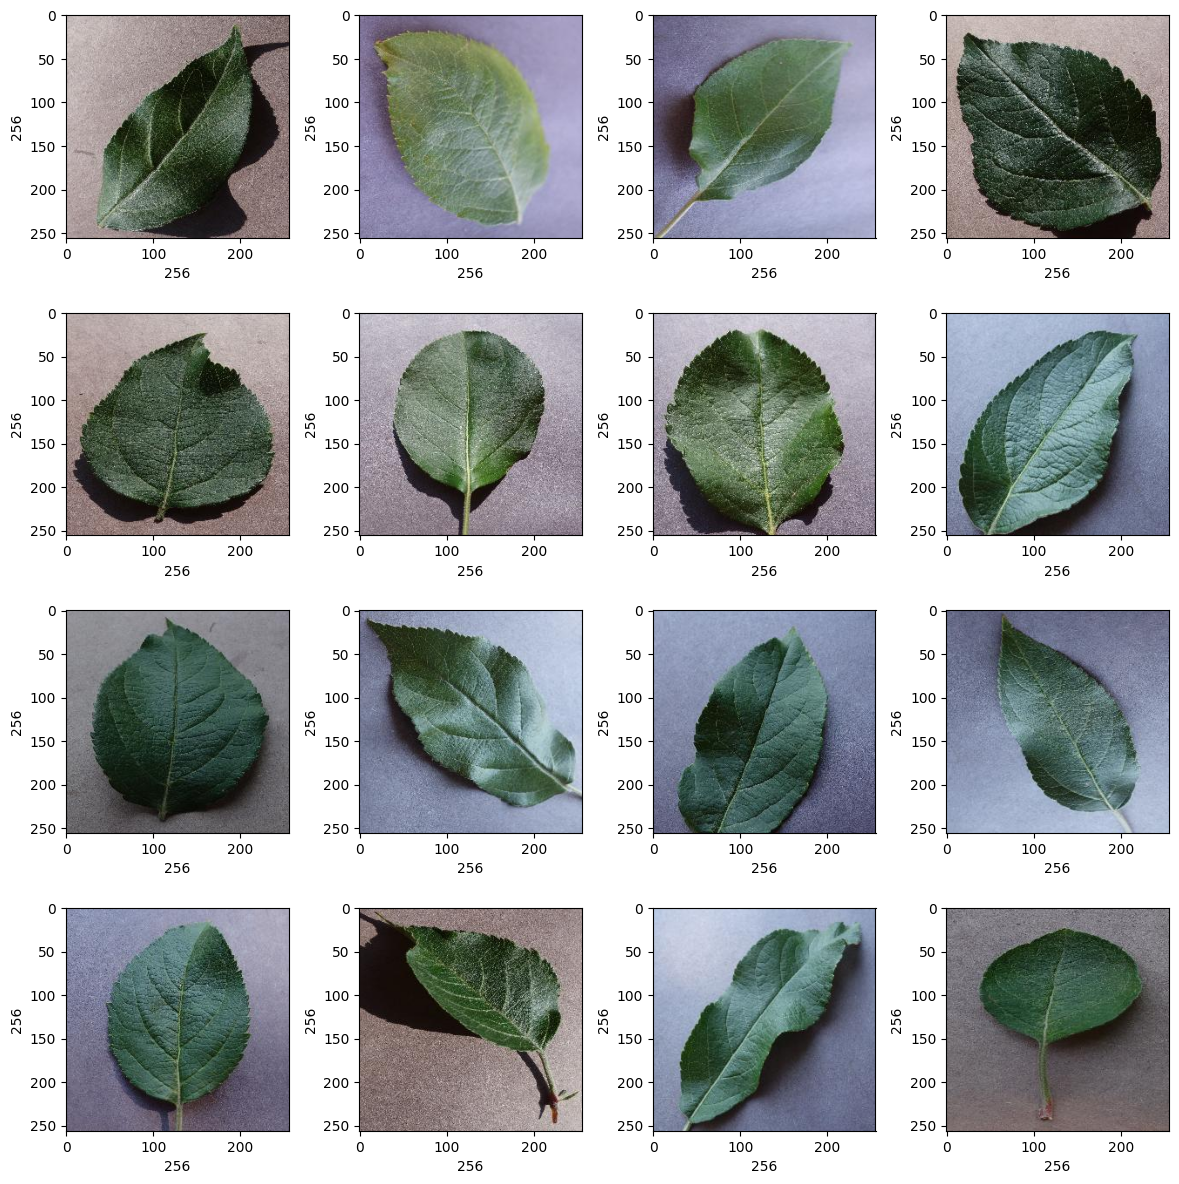

In [4]:
plt.figure(figsize=(12,12))
path="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color/Apple___healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [6]:
dir="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color"
image_list,label_list=[],[]
all_labels=['Apple_Cedar_apple_rust', 'Apple_healthy', 'Apple_Black_rot']
binary_labels=[0,1,2]
temp=-1

for directory in ['Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___Black_rot']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0
1    1645
2     621
0     275
Name: count, dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [10]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [11]:
x_train[0].shape

(256, 256, 3)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="categorial_crossentropy",optimizer=Adam(0.0001),metrics=["accuracy"])

In [15]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [17]:
epochs=50
batch_size=128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5675 - loss: 0.9902 - val_accuracy: 0.7543 - val_loss: 0.6628
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 736ms/step - accuracy: 0.7609 - loss: 0.5815 - val_accuracy: 0.7961 - val_loss: 0.4296
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 785ms/step - accuracy: 0.8414 - loss: 0.3902 - val_accuracy: 0.8943 - val_loss: 0.3022
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 817ms/step - accuracy: 0.9341 - loss: 0.2417 - val_accuracy: 0.9312 - val_loss: 0.2718
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 951ms/step - accuracy: 0.9566 - loss: 0.2295 - val_accuracy: 0.9337 - val_loss: 0.2602
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9644 - loss: 0.1868 - val_accuracy: 0.9410 - val_loss: 0.2377
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9674 - loss: 0.1874 - val_accuracy: 0.9459 - val_loss: 0.2343
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 804ms/step - accuracy: 0.9723 - loss: 0.1676 - val_accuracy: 0.9

In [18]:
model.save=("/content/drive/MyDrive/Ethic Project/Model/apple_plant_disease_model.h5")


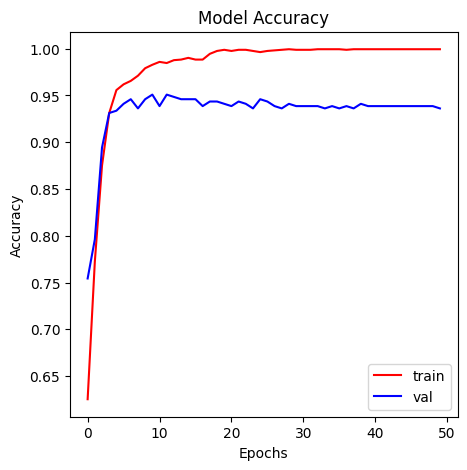

In [19]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],color="r")
plt.plot(history.history["val_accuracy"],color="b")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

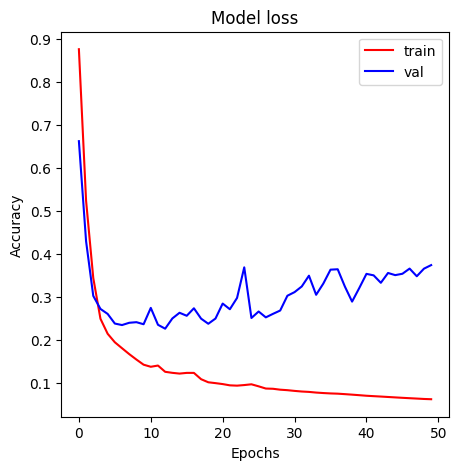

In [20]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],color="r")
plt.plot(history.history["val_loss"],color="b")
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

In [21]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9636 - loss: 0.1796
Test Accuracy: 96.07072472572327


In [22]:
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


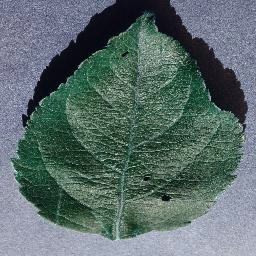

In [23]:
img=array_to_img(x_test[11])
img

In [24]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Apple_healthy
Predicted Label:  Apple_Black_rot
[9.0684305e-05 9.9967301e-01 2.3626235e-04]


In [26]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_Black_rot - Apple_Black_rot
Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_Black_rot - Apple_Black_rot
Apple_healthy - Apple_healthy
Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_Black_rot - Apple_Black_rot
Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_healthy - Apple_healthy
Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_Cedar_apple_rust - Apple_Cedar_apple_rust
Apple_Black_rot - Apple_Black_rot
Apple_healthy - Apple_healthy
Apple_Black_rot - Apple_Black_rot
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_Black_rot - Apple_Black_rot
Apple_healthy - Apple_healthy
Apple_healthy - Apple_healthy
Apple_healthy - Apple_health